In [36]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
#df=pd.read_csv("/Users/minh.pham/Downloads/Iris 3 classes.csv")
url='https://drive.google.com/file/d/1mNro_AjVuQXGfb3WLc0UWK3fdLadL5OI/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

In [37]:
df


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<strong>Count the number of unique classifications

In [38]:
df['class'].nunique()

3

<strong>Making test and train sample for model

In [39]:
from sklearn.model_selection import train_test_split
Y=df['class']
X=df.drop('class',axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=123)
#print(X_train,X_test,Y_train,Y_test)

In [40]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver="lbfgs",multi_class="multinomial").fit(X_train,Y_train)
print(model.score(X_test,Y_test))
print(model.predict(X_test))
print(model.predict_proba(X_test))


0.9736842105263158
['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa']
[[1.04104549e-03 6.29755384e-01 3.69203571e-01]
 [4.28353782e-05 9.48310942e-02 9.05126070e-01]
 [1.80196167e-05 4.28422203e-02 9.57139760e-01]
 [3.03954808e-02 9.25002260e-01 4.46022590e-02]
 [9.59430324e-01 4.05695838e-02 9.22257985e-08]
 [2.29642762e-03 4.98666467e-01 4.99037106e-01]
 [3.65823975e-03 9.10527641e-01 8.58141189e-02]
 [9.84846920e-01 1.51530462

<strong>Confusion matrix and heatmap

[[16  0  0]
 [ 0  8  0]
 [ 0  1 13]]


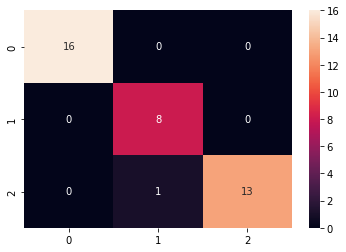

In [41]:
from sklearn.metrics import confusion_matrix
guess=model.predict(X_test)
cm=confusion_matrix(Y_test,guess) 
print(cm)
plt.figure()
sn.heatmap(cm,annot=True) #font size
plt.show()

<strong>Changing count number to probabilty ratio

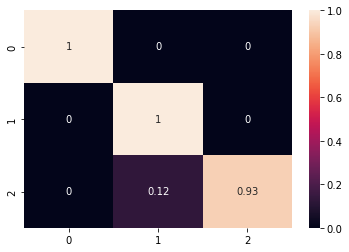

In [42]:
cm=cm/cm.astype(np.float64).sum(axis=1)
plt.figure()
sn.heatmap(cm,annot=True)
plt.show()
